# **Introduction to algebra and statistics**

First the Drive folder has to be mounted.

In [61]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Change to assignment directory (My is 'ML_CC' and I would like to have it  by default).

In [62]:
import os
os.chdir('/content/drive/My Drive/ML_CC') #### You should add your forder here!

##  Load a multispectral image

**Reminder**: gdal is one package to load data.

In [63]:
import gdal
image_path = './data/S2_clip.tif'
tifsrc = gdal.Open(image_path)
# Load the image stating in the row 
S2 = tifsrc.ReadAsArray(3000, 1000, 400, 400)
S2 = np.moveaxis(S2, 0, -1)

## Plot individual bands of the images

**Remainder**: matplotlib is a package to plot data.

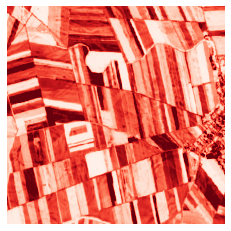

In [64]:
import numpy as np
import matplotlib.pyplot as plt
## RED Band:
RED = S2[:,:,2]
f=plt.figure()
plt.imshow(np.array(RED),vmax=np.percentile(RED,95),cmap='Reds')
plt.axis('off')
plt.show()

## Select pixels in the images

In [65]:
# One pixel of one band: Scalar
print('Scalar: hyperspectral pixel value of the band red', RED[18,25])
# One pixel of multispectral image:
print('Array: Sentinel-2 pixel values', S2[24,35,:])
# Select small area of the red band multispectral image:
print('Matrix: Sentinel-2 area', S2[0:10,0:10,0])

Scalar: hyperspectral pixel value of the band red 481
Array: Sentinel-2 pixel values [ 417  713  425 3602]
Matrix: Sentinel-2 area [[824 807 807 813 813 828 808 798 829 785]
 [782 796 799 819 827 827 812 822 813 790]
 [777 788 788 816 833 833 813 839 833 805]
 [752 779 818 842 819 819 827 856 839 837]
 [739 768 790 808 830 813 813 819 822 835]
 [756 765 772 792 802 786 786 827 813 814]
 [792 772 753 743 756 786 786 827 813 814]
 [792 772 753 743 756 791 793 793 770 793]
 [795 756 715 731 735 748 787 787 797 783]
 [750 753 756 753 731 731 759 759 797 757]]


# Algebra:

VECTORS OPERATIONS

In [66]:
# Norm of a vector:
v = S2[24,35,:]
norm_vect_v = np.linalg.norm(v)
u = S2[140,25,:]
norm_vect_u = np.linalg.norm(u)
# Angle between two vectors:
angle = np.arccos(np.dot(v,u)/(norm_vect_v*norm_vect_u))
print('Angle between two vectors:',angle)

Angle between two vectors: 1.5688384536018947


MATRIX OPERATIONS

Determinant -1.1563655908298006e+68


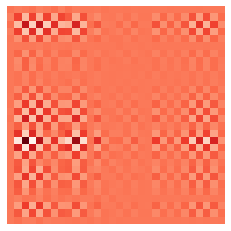

Inverse size (30, 30)
trace 16685


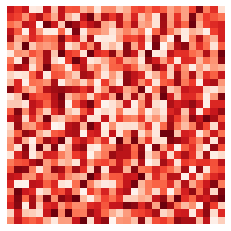

Multiplication size (30, 30)


In [67]:
# Determinat
deter_S2 = np.linalg.det(S2[0:30,0:30,0])
print('Determinant',deter_S2)
# Inverse
inv_S2 = np.linalg.inv(S2[0:30,0:30,0])
f=plt.figure()
plt.imshow(np.array(inv_S2),cmap='Reds')
plt.axis('off')
plt.show()
print('Inverse size', inv_S2.shape)
# trace of matrix:
tr_S2 = np.diag(S2[0:30,0:30,0]).sum()
print('trace',tr_S2)
#Multiplication:
multi_S2 = np.dot(S2[0:30,0:30,0],S2[0:30,0:30,1])
f=plt.figure()
plt.imshow(np.array(multi_S2),cmap='Reds')
plt.axis('off')
plt.show()
print('Multiplication size', inv_S2.shape)

MATRIX DECOMPOSITION

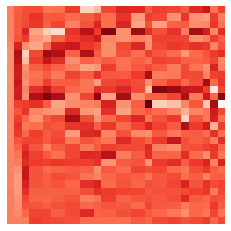

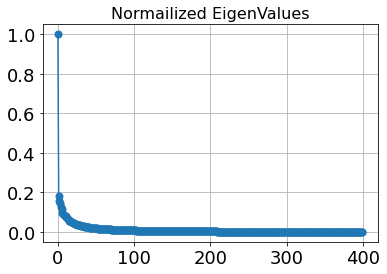

<Figure size 432x288 with 0 Axes>

In [68]:
#Eigenvalues and eigenvectors:
from numpy.linalg import eig
Lambda,U = eig(S2[100:130,100:130,3])

#Plot the real part of the eigenvectors:
f=plt.figure()
plt.imshow(np.array(np.real(U)),cmap='Reds')
plt.axis('off')
plt.show()


# Singular value decomposition:
from scipy.linalg import svd
U, Lambda1, VT = svd(RED)

# Plot the normalized singular values:
plt.plot(range(len(Lambda1)),Lambda1/np.max(Lambda1),'.-',markersize=14)
plt.title("Normailized EigenValues",{'size':'16'})
plt.xticks(np.linspace(0, len(Lambda1), 5))
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

# Statistics

Mean, Median and Mode

In [69]:
from scipy import stats
# Pixel:
print('mean pixel:',np.mean(v))
print('median pixel:',np.median(v))
print('mode pixel:',stats.mode(v))
# Matrix:
print('mean matrix:',np.mean(np.mean(RED)))
print('median matrix:',np.median(np.median(RED)))
print('mode matrix:',stats.mode(stats.mode(RED)))

mean pixel: 1289.25
median pixel: 569.0
mode pixel: ModeResult(mode=array([417], dtype=uint16), count=array([1]))
mean matrix: 874.9878375
median matrix: 902.0
mode matrix: ModeResult(mode=array([[[ 7,  4,  5,  5,  6,  5,  6,  5,  6,  4,  6,  5,  5,  4,  5,  5,
          5,  4,  5,  5,  4,  5,  4,  6,  4,  4,  4,  5,  4,  5,  4,  5,
          6,  5,  4,  6,  5,  4,  5,  4,  4,  5,  4,  5,  4,  4,  5,  4,
          4,  5,  4,  4,  4,  5,  6,  5,  6,  5,  5,  6,  5,  6,  4,  6,
          6,  5,  4,  8,  5,  5,  5,  6,  5,  5,  5,  5,  5,  5,  5,  6,
          6,  5,  6,  6,  6,  5,  4,  5,  5,  6,  7,  6,  7, 10,  5,  5,
          7,  7,  5,  6, 10,  5,  9,  6,  7,  5,  6,  6,  6,  5,  7,  6,
          5,  6,  6,  5,  8,  6,  5,  4,  4,  5,  6,  5,  4,  7,  5,  5,
          5,  8,  5,  5,  6,  7,  6,  6,  6,  5,  7,  5,  6,  5,  4,  8,
          5,  5,  7,  5,  6,  7,  5,  6,  6,  6,  5,  9,  6,  6,  5,  6,
          5,  8,  5,  6,  6,  6,  5,  5,  4,  5,  5,  5,  5,  5,  5,  6,
        

Standard deviation and variance

In [70]:
# Pixel:
print('standard deviation pixel:',np.std(v))
print('variance pixel:',np.var(v))

# Matrix:
print('standard deviation matrix:',np.std(RED))
print('variance matrix:',np.var(RED))


standard deviation pixel: 1340.580541220855
variance pixel: 1797156.1875
standard deviation matrix: 425.50781598529255
variance matrix: 181056.9014645736


Covariance and Correlation

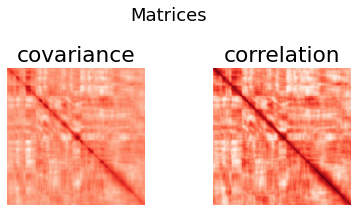

In [71]:
GREEN = S2[:,:,1]
# Pixel:
# covariance:
cov_array = np.cov(v,u)
# correlation:
corr_array = np.corrcoef(v,u)

# Matrix:
# covariance:
n_row = RED.shape[0]
cov_matrix = np.cov(RED,GREEN)
cov_matrix = cov_matrix[0:n_row,n_row:n_row*2]
# correlation:
corr_matrix = np.corrcoef(RED,GREEN)
corr_matrix = corr_matrix[0:n_row,n_row:n_row*2]

fig, axs = plt.subplots(1,2)
fig.suptitle('Matrices',size=18)
fig.tight_layout()
axs[0].imshow(cov_matrix,cmap='Reds')
axs[0].axis('off')
axs[0].title.set_text('covariance')

axs[1].imshow(corr_matrix,cmap='Reds')
axs[1].axis('off')
axs[1].title.set_text('correlation')


Percentile

In [72]:
print('percentile 95:', np.percentile(RED,95))

percentile 95: 1630.0


Plot multispectral RGB image

The percentile is used to eliminate outliers and then, see well the image.

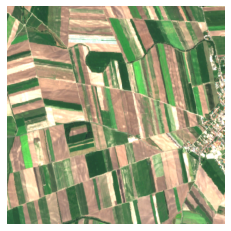

In [73]:
# reminder: R, G, B, NIR
image = S2[..., [0,1,2]]
img = np.dstack((S2[:,:, 2]/np.percentile(image, 95),
                 S2[:,:, 1]/np.percentile(image, 95),
                 S2[:,:, 0]/np.percentile(image, 95)))

img1 = np.clip(img,0,1)
plt.imshow(img1)
plt.axis('off')
plt.show()

False Color Coposition: NIR, red and green

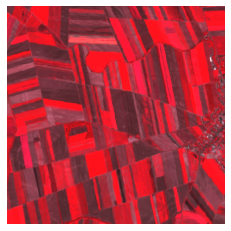

In [74]:
# reminder: R, G, B, NIR
image = S2[..., [3,0,1]]
img = np.dstack((S2[:,:, 3]/np.percentile(image, 95),
                 S2[:,:, 0]/np.percentile(image, 95),
                 S2[:,:, 1]/np.percentile(image, 95)))

img1 = np.clip(img,0,1)
plt.imshow(img1)
plt.axis('off')
plt.show()

Histogram

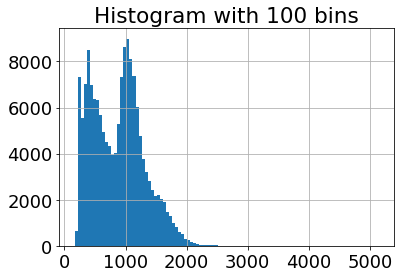

In [75]:
RED_array = np.reshape(RED,(RED.shape[0]*RED.shape[1]))
_ = plt.hist(RED_array, bins=100) 
plt.title("Histogram with 100 bins")
plt.grid('on')
plt.show()

SCATTER PLOT

A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.

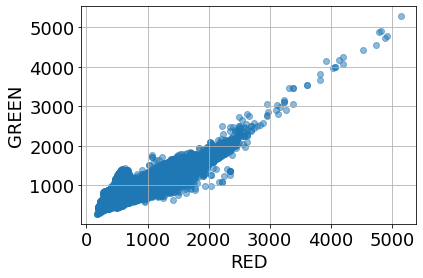

In [76]:
#RED_array is defined in previous cell
GREEN_array = np.reshape(GREEN,(GREEN.shape[0]*GREEN.shape[1]))
plt.scatter(RED_array, GREEN_array, alpha=0.5)
plt.grid('on')
plt.xlabel('RED')
plt.ylabel('GREEN')
plt.show()

Scale and Standardize

max values per column [4920. 5284. 5152. 6212.]
min values per column [231. 280. 167. 545.]
mean values per column [ 663.81938125  868.6992625   874.9878375  2810.42885625]
std values per column [  62448.35327062   66580.66469446  181056.90146457 1204632.59618857]


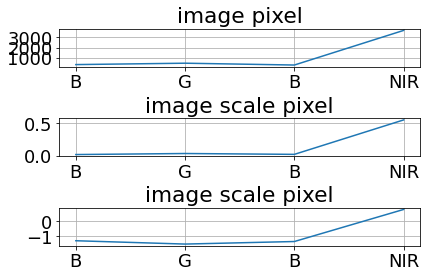

In [87]:
# reshape the image from 3D to 2D:
image1 = np.reshape(S2,(S2.shape[0]*S2.shape[1],S2.shape[2]))

# Load MinMaxScaler class:
from sklearn.preprocessing import MinMaxScaler
# generate the scale object:
scale = MinMaxScaler()

# Compute the minimum and maximum to be used for later scaling:
scale.fit(image1)
print('max values per column',scale.data_max_)
print('min values per column',scale.data_min_)
# Scale the data according to range, by default (0,1):
image1sc=scale.transform(image1)

# Load StandardScaler class:
from sklearn.preprocessing import StandardScaler
# generate the scaler object:
scaler = StandardScaler()
# Compute the minimum and maximum and transform the data:
stand_image = scaler.fit_transform(image1)
print('mean values per column',scaler.mean_)
print('std values per column',scaler.var_)

fig, axs = plt.subplots(3,1)
fig.tight_layout()
axs[0].plot(image1[24,:])
axs[0].grid('on')
axs[0].title.set_text('image pixel')
axs[0].set_xticklabels(['','B','G','B','NIR'])

axs[1].plot(image1sc[24,:])
axs[1].grid('on')
axs[1].title.set_text('image scale pixel')
axs[1].set_xticklabels(['','B','G','B','NIR'])

axs[2].plot(stand_image[24,:])
axs[2].grid('on')
axs[2].title.set_text('image scale pixel')
axs[2].set_xticklabels(['','B','G','B','NIR'])
plt.show()